# Some EDA

In [53]:
# DS essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# python support
import re
import string
import datetime
import pickle 
from collections import Counter

# NLTK
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import words, stopwords, wordnet
from wordcloud import WordCloud
from nltk import FreqDist

# sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# spacy
import spacy

from preprocessing_funcs import clean_tweet, get_hashtags

In [2]:
with open('../data_files/processed_tweets.pickle', 'rb') as read_file:
    tweets = pickle.load(read_file)

In [3]:
tweets.head()

,text,processed
0,#IslamKills Are you trying to say that there w...,islam kill try say terrorist attack europe ref...
1,"Clinton: Trump should’ve apologized more, atta...",clinton trump apologize attack little
2,RT @ltapoll: Who was/is the best president of ...,well president past retweet
3,RT @jww372: I don't have to guess your religio...,guess religion christmas aftermath
4,RT @Shareblue: Pence and his lawyers decided w...,pence lawyer decide official email public can see


## Raw Tweets WordCloud

In [25]:
raw_words = " ".join(tweets.text.values).split()

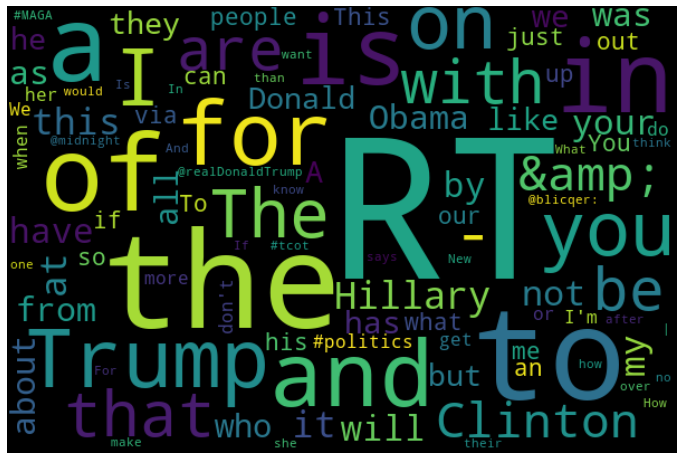

In [44]:
raw_fdist = FreqDist(raw_words)

wc = WordCloud(width=600, height=400, max_words=100).generate_from_frequencies(raw_fdist)
plt.figure(figsize=(12, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Processed Tweets WordCloud

In [19]:
processed_words = " ".join(tweets.processed.values).split()

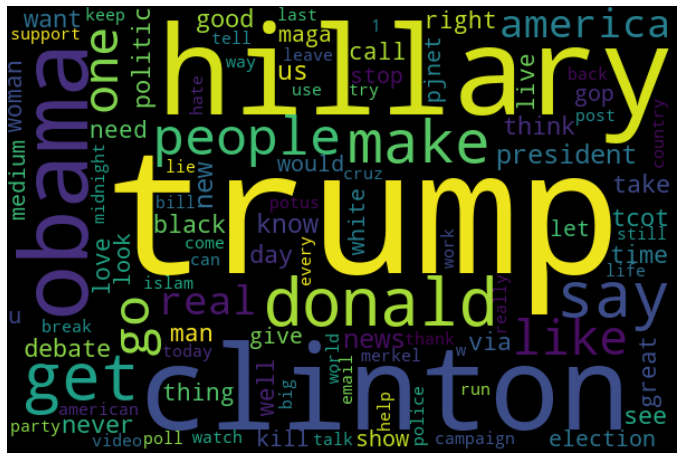

In [41]:
fdist_proc = FreqDist(processed_words)

wc = WordCloud(width=600, height=400, max_words=100).generate_from_frequencies(fdist_proc)
plt.figure(figsize=(12, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
fdist_proc.most_common(10)

[('trump', 38090),
 ('hillary', 17841),
 ('clinton', 16255),
 ('obama', 9788),
 ('donald', 9312),
 ('get', 8883),
 ('say', 8216),
 ('make', 7347),
 ('people', 7097),
 ('go', 7011)]

Most common n-grams

In [43]:
stop_words = stopwords.words('english')

In [60]:
tokens_proc = [w for w in nltk.word_tokenize(" ".join(tweets.processed.values)) if w not in stop_words]

In [61]:
from nltk.util import ngrams 

def get_frequent_ngram(tokens, ngram, n=10):
    """Find most common n n-grams in tokens."""
    n_grams = ngrams(tokens, ngram)
    freq_dist = FreqDist(n_grams)
    top_freq = freq_dist.most_common(n)
    return pd.DataFrame(top_freq, columns=["ngram", "count"])

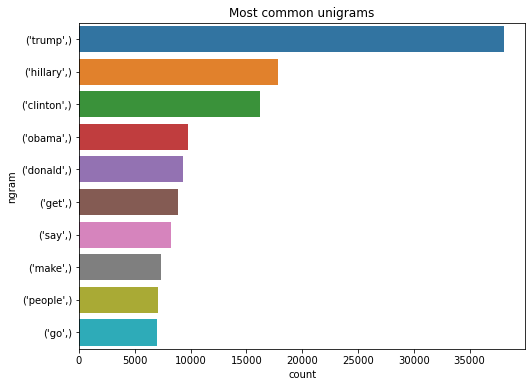

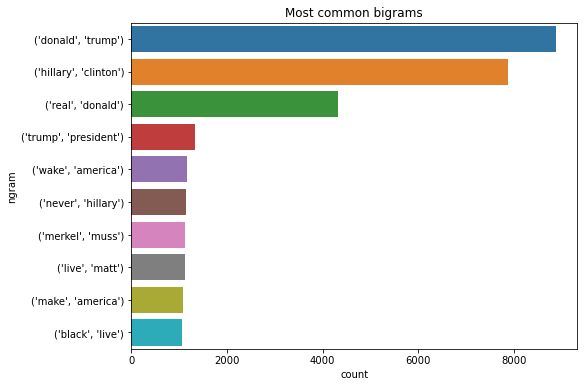

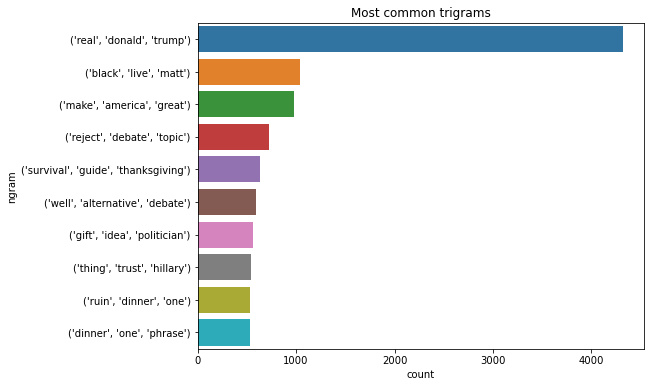

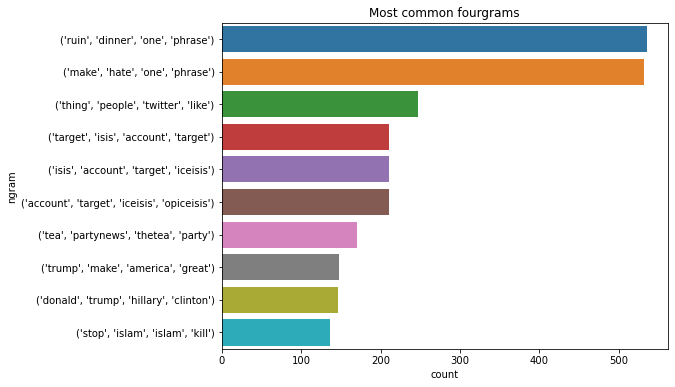

In [62]:
# Get frequent ngrams for all 4
for i in range(1,5):
    mapping = {1:"uni", 2:"bi", 3:"tri", 4:"four"}
    plt.figure(figsize=(8,6))
    sns.barplot(x="count", y="ngram", data=get_frequent_ngram(tokens_proc, i, 10))
    plt.title(f"Most common {mapping[i]}grams");

## Hashtags WordCloud

In [27]:
tweets['hashtags'] = tweets['text'].map(get_hashtags)

In [29]:
tweets.head()

,text,processed,hashtags
0,#IslamKills Are you trying to say that there w...,islam kill try say terrorist attack europe ref...,[IslamKills]
1,"Clinton: Trump should’ve apologized more, atta...",clinton trump apologize attack little,[]
2,RT @ltapoll: Who was/is the best president of ...,well president past retweet,[]
3,RT @jww372: I don't have to guess your religio...,guess religion christmas aftermath,[ChristmasAftermath]
4,RT @Shareblue: Pence and his lawyers decided w...,pence lawyer decide official email public can see,[]


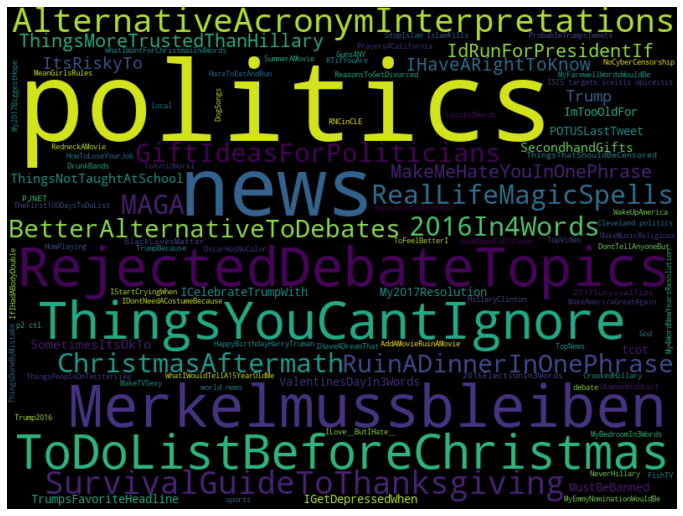

In [63]:
fdist_hashtags = FreqDist(tweets['hashtags'].apply(lambda x: " ".join(x)))

wc = WordCloud(width=800, height=600, max_words=100).generate_from_frequencies(fdist_hashtags)
plt.figure(figsize=(12, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [70]:
top_20_hashtags = fdist_hashtags.most_common(21)
top_20_hashtags

[('', 103115),
 ('politics', 3285),
 ('news', 1497),
 ('Merkelmussbleiben', 677),
 ('RejectedDebateTopics', 671),
 ('ThingsYouCantIgnore', 616),
 ('ToDoListBeforeChristmas', 604),
 ('AlternativeAcronymInterpretations', 576),
 ('SurvivalGuideToThanksgiving', 569),
 ('RealLifeMagicSpells', 551),
 ('MAGA', 549),
 ('ChristmasAftermath', 545),
 ('2016In4Words', 537),
 ('GiftIdeasForPoliticians', 519),
 ('BetterAlternativeToDebates', 512),
 ('RuinADinnerInOnePhrase', 509),
 ('ThingsMoreTrustedThanHillary', 505),
 ('IdRunForPresidentIf', 503),
 ('MakeMeHateYouInOnePhrase', 497),
 ('IHaveARightToKnow', 480),
 ('ItsRiskyTo', 452)]

In [71]:
top_20_hashtags.pop(0)

('', 103115)

In [73]:
len(top_20_hashtags)
top_20_hashtags

[('politics', 3285),
 ('news', 1497),
 ('Merkelmussbleiben', 677),
 ('RejectedDebateTopics', 671),
 ('ThingsYouCantIgnore', 616),
 ('ToDoListBeforeChristmas', 604),
 ('AlternativeAcronymInterpretations', 576),
 ('SurvivalGuideToThanksgiving', 569),
 ('RealLifeMagicSpells', 551),
 ('MAGA', 549),
 ('ChristmasAftermath', 545),
 ('2016In4Words', 537),
 ('GiftIdeasForPoliticians', 519),
 ('BetterAlternativeToDebates', 512),
 ('RuinADinnerInOnePhrase', 509),
 ('ThingsMoreTrustedThanHillary', 505),
 ('IdRunForPresidentIf', 503),
 ('MakeMeHateYouInOnePhrase', 497),
 ('IHaveARightToKnow', 480),
 ('ItsRiskyTo', 452)]

In [75]:
hashtag_df = pd.DataFrame(top_20_hashtags, columns=["hashtag", "count"])
hashtag_df.head()

,hashtag,count
0,politics,3285
1,news,1497
2,Merkelmussbleiben,677
3,RejectedDebateTopics,671
4,ThingsYouCantIgnore,616


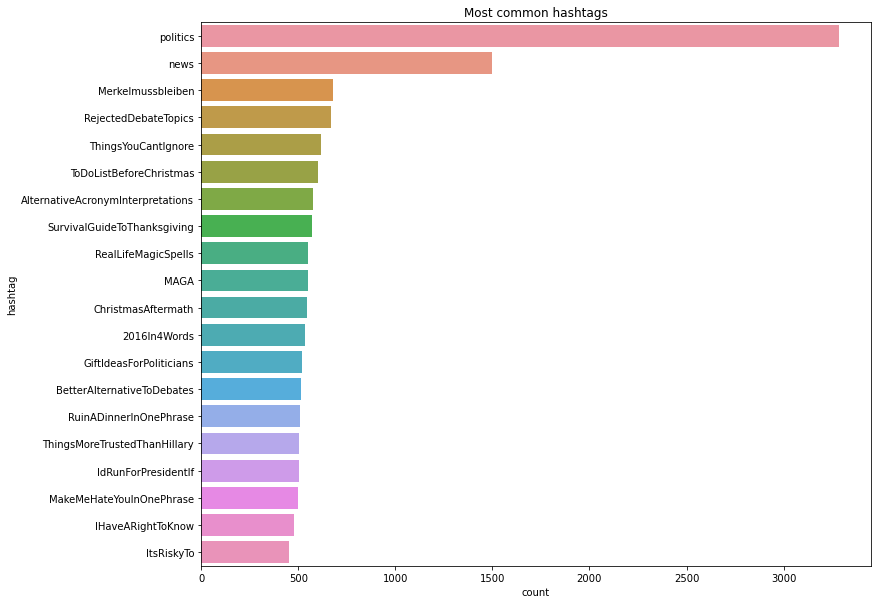

In [80]:
plt.figure(figsize=(12,10))
sns.barplot(x="count", y="hashtag", data=hashtag_df)
plt.title('Most common hashtags');